In [13]:
import numpy as np
from PIL import Image
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import math
import os,sys
import scipy
import time
%matplotlib inline

In [2]:
def gaussian_function(x, sigma):
    if sigma == 0:
        return 0
    else:
        g = math.exp(-x*x)/(2*sigma*sigma)
    return g

In [3]:
def gaussian_mask(sigma):
    g = np.ones((1,5), np.float32)
    g_1d = np.ones((1,5), np.float32)
    g_2d = np.ones((1,5), np.float32)
    
    for i in range(-2, 3):
               
        gaussian_1 = gaussian_function(i, sigma)
        gaussian_2 = gaussian_function(i-0.5, sigma)
        gaussian_3 = gaussian_function(i+0.5, sigma)
        gaussian = (gaussian_1+ gaussian_2+gaussian_3)/3
        g[0][i+2] = gaussian * (1/(math.sqrt(2.0 * math.pi * sigma * sigma)))
        g_1d[0][i+2] = gaussian * (-i) * (1/(math.sqrt(2.0 * math.pi * sigma**4)))
        g_2d[0][i+2] = gaussian * (-1 + (i*i)/(sigma*sigma))* (1/(math.sqrt(2.0 * math.pi * sigma**4)))
    return (g, g_1d, g_2d)

In [4]:

def gaussian_conv(I, G, S):
    
    Iyy = [] 
    Igx = []
    Igy = []

    #convolving in the x direction
    for i in range(S[0]):
        I1 = (np.convolve(I[i,:], G, 'same'))
        Igx.append(np.array(I1))

    #convolving in the y direction
    for i in range(S[1]):
        I2 = (np.convolve(I[:,i], G, 'same'))
        Iyy.append(np.array(I2))
        Igy = np.transpose(Iyy)

    return(Igx, Igy)

In [5]:
def gaussian_1derv_conv(Ix,Iy,Gx,Gy):
    
    Iyy = []
    S = np.shape(Ix)
    I_x = []
    I_y = []
    #computing for I_x
    for i in range(0, S[0]):
        I1 = (np.convolve(np.array(Ix)[i,:], Gx, 'same'))
        I_x.append(np.array(I1))

    #Computing for I_y
    for i in range(0, S[1]):
        I2 = (np.convolve(np.array(Iy)[:,i], Gy, 'same'))
        Iyy.append(np.array(I2))
        I_y = np.transpose(Iyy)

    return(I_x, I_y)

In [6]:
def gaussian_2derv_conv(Ix,Iy,Gx,Gy):
    
    Iyy = Iyyy = []
    S = np.shape(Ix)
    I_x = []
    I_y = Ixy = []
    #computing for I_x
    for i in range(0, S[0]):
        I1 = (np.convolve(np.array(Ix)[i,:], Gx, 'same'))
        I_x.append(np.array(I1))

    #Computing for I_y
    for i in range(0, S[1]):
        I2 = (np.convolve(np.array(Iy)[:,i], Gy, 'same'))
        Iyy.append(np.array(I2))
        I_y = np.transpose(Iyy)

    #Computing for I_xy
    for i in range(0, S[1]):
        I3 = (np.convolve(np.array(Ix)[:,i], Gy, 'same'))
        Iyyy.append(np.array(I3))
        Ixy = np.transpose(Iyyy)

    return(I_x, I_y, Ixy)

In [11]:
def Hessian_matrix(Image):
    start = 0
    start = time.time()
    I = np.array(Image)
    S = np.shape(I)

    g = np.ones((1,5), np.float32)
    g_1d = np.ones((1,5), np.float32)
    g_2d = np.ones((1,5), np.float32)

    g, g_1d, g_2d = gaussian_mask(sigma)

    G = g.flatten()
    G1dx = g_1d.flatten()
    G1dy = np.transpose(G1dx)
    G2dx = g_2d.flatten()
    G2dy = np.transpose(G2dx)

    #to smoothen the image
    Igx = Igy = []
    Igx, Igy = gaussian_conv(I, G, S)

    #convoluting Image with 1st derivative of I
    Ix = Iy = []
    Ix, Iy = gaussian_1derv_conv(Igx, Igy, G1dx, G1dy)

    Ixx = Iyy= Ixy =[]
    Ixx, Iyy, Ixy = gaussian_2derv_conv(Ix, Iy, G2dx, G2dy)

    t = 87
    x=y=[]
    for i in range(S[0]):
        for j in range(S[1]):
            Hessian = ([Ixx[i][j], Ixy[i][j]], [Ixy[i][j], Iyy[i][j]])
            H = np.linalg.eigvals(Hessian)
            if(abs(H[1])>t and abs(H[0])>t):
                y.append[i]
                x.append[j]
    plt.figure()
    plt.imshow(I, cmap = cm.gray)
    plt.plot(x,y, 'ro')
    plt.show()
    return (time.time() - start)

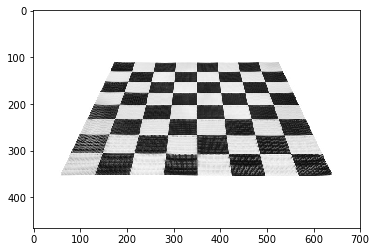

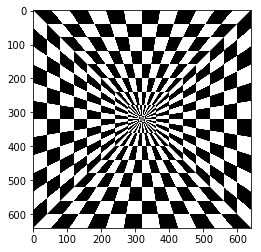

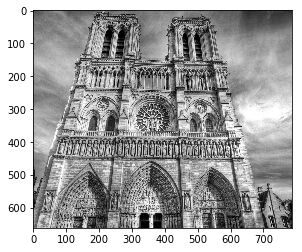

time for Image1 46.61347985267639
time for Image2 54.3387987613678
time for Image3 72.71376633644104


In [12]:
sigma =1.5
Image1 = Image.open("/home/srikar/Downloads/input1 (1).png").convert('L')
time1 = Hessian_matrix(Image1)
Image2 = Image.open("/home/srikar/Downloads/input2.png").convert('L')
time2 = Hessian_matrix(Image2)
Image3 = Image.open("/home/srikar/Downloads/input3.png").convert('L')
time3 = Hessian_matrix(Image3)
print ("time for Image1", time1)
print("time for Image2", time2)
print("time for Image3", time3)